<a href="https://colab.research.google.com/github/DataEtnos/Estudos-2/blob/main/clustering_playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contextualização

![](https://media-exp1.licdn.com/dms/image/C4E12AQGbAM-_eriLMw/article-cover_image-shrink_720_1280/0/1632916005843?e=1669248000&v=beta&t=Jrz7HA1m-Qbhm08T89CaeaESJnsodVxsetVxJHVsVKM)

[Fonte da imagem](https://www.linkedin.com/pulse/supervised-vs-unsupervised-learning-whats-difference-smriti-saini/)

**Aprendizado não-supervisionado (unsupervised learning)**

No aprendizado não supervisionado, do qual **clustering** faz parte, **não há variável resposta**, e entre seus objetivos estão o tratamento, exploração e diagnóstico dos dados (exemplo: encontrar padrões).

**Exemplos:**
- **Clustering:** identificar e agrupar observações similares.
- **Dimensionality reduction:** reduzir a quantidade de dimensões (variáveis).

**Quantos algoritmos não-supervisionados temos?**

- Clustering: [https://scikit-learn.org/stable/modules/clustering.html](https://scikit-learn.org/stable/modules/clustering.html)
- Dimentionality reduction: [https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition)

**Classifique como tarefa supervisionada ou não-supervisionada:**

1. Segmentação de clientes para entendermos melhor diferentes perfis: ________
2. Classificação de clientes em churn e não-churn: ________
3. Agrupamento de produtos similares entre si: ________
4. Redução da dimensionalidade dos dados: ________
5. Previsão da probabilidade de um cliente contratar o serviço: ________

<details>
  <summary><b>Respostas</b></summary>
  <ol type="1">
  <li><b>unsupervised learning</b></li>
  <li>supervised learning</li>
  <li><b>unsupervised learning</b></li>
  <li><b>unsupervised learning</b></li>
  <li>supervised learning</li>
  </ol>
</details>


# Setup

In [ ]:
%%capture
%pip install kmodes

In [ ]:
# Data wrangling
import numpy as np
import pandas as pd

# Dataviz
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance, kelbow_visualizer, silhouette_visualizer

## -- Machine learning -- ##
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.cluster import k_means, dbscan, mean_shift, estimate_bandwidth
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from kmodes.kmodes import KModes            # clustering categorical data
from kmodes.kprototypes import KPrototypes  # clustering mixed data

# Didatic purposes
import string
from ipywidgets import interact

In [ ]:
# https://matplotlib.org/stable/tutorials/introductory/customizing.html
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.8,
    palette='tab10',
    rc={
        'figure.figsize': (12,8),
        'axes.grid': True,
        'grid.alpha': .2,
        'axes.titlesize': 'x-large',
        'axes.titleweight': 'bold',
        'axes.titlepad': 20,
    }
)

scatter_kwargs = dict(palette='viridis', alpha=0.8, linewidth=0)

# K-means

Apps de simulação:
- [Versão em português (streamlit)](https://cmcouto-silva-kmeans-app-pt-streamlit-app-tyl62y.streamlitapp.com/)
- [Versão em português (dash)](https://kmeans-animation-pt.herokuapp.com/)
- [Versão em inglês](https://cmcouto-silva-kmeans-app-en-streamlit-app-v886a2.streamlitapp.com/)

**Requerimentos:**
- Dados numéricos contínuos
- Dados na mesma escala
- Pré-determinação do número de grupos (k)

**Vantagens:**
- Simples
- Eficiente
- Escalável para uma grande quantidade de dados

**Desvantagens:**
- Sensível a outliers
- Pré-determinação do número de grupos (k)
- Não adequado para dados categóricos (mesmo com one-hot encoding)
- Agrupa apenas pontos próximos entre si

Por quê não utilizar dummies no algoritmo? Vide:
- [https://www.ibm.com/support/pages/clustering-binary-data-k-means-should-be-avoided](https://www.ibm.com/support/pages/clustering-binary-data-k-means-should-be-avoided)
- Livro: Practical Statistics for Data Scientists (Peter Bruce et al., 2020)
- Statistical foruns

## Simulated Data

In [ ]:
# Simulate clusters
X,y = datasets.make_blobs(n_samples=int(5E3), n_features=2, centers=4, cluster_std=.8)
df = pd.DataFrame(X, columns=list(string.ascii_uppercase[:X.shape[1]]))
df.head()

,A,B
0,-9.211275,-8.432481
1,-8.828168,-6.983324
2,4.796430,-3.409155
3,-7.471199,-7.479524
4,-7.951339,-6.659881


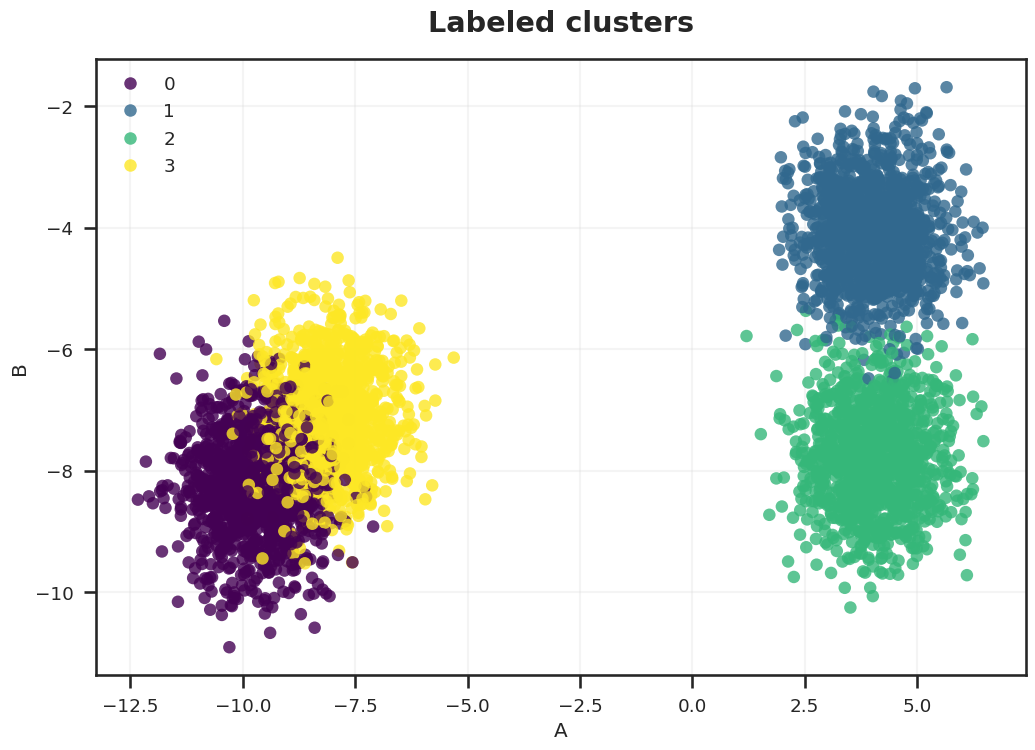

In [ ]:
# Visualize simulated clusters
sns.scatterplot(data=df, x='A', y='B', hue=y, **scatter_kwargs)
plt.title('Labeled clusters')
plt.show()

## Distinct APIs for K-means

No sklearn, podemos utilizar algoritmos de clusterização através classes ou funções (vide [este link](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster)).

In [ ]:
# Usando função
centroids, labels, intertia = k_means(X, n_clusters=4)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


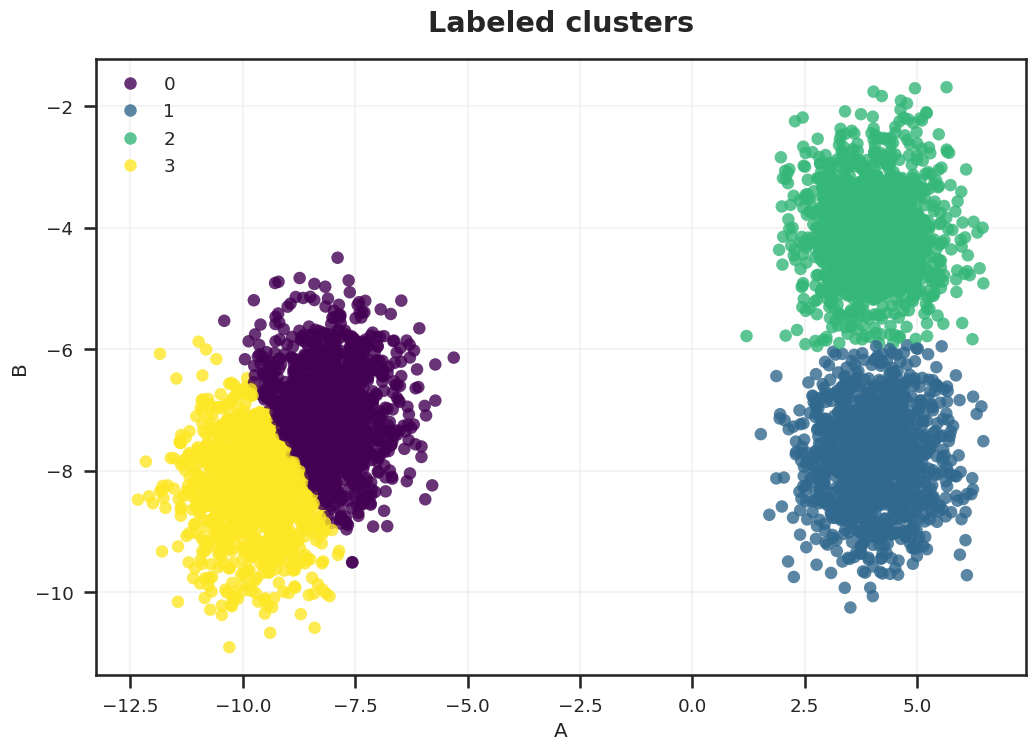

In [ ]:
sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs)
plt.title('Labeled clusters')
plt.show()

In [ ]:
# Using KMeans
model = KMeans(n_clusters=4)
model.fit(X)

centroids = model.cluster_centers_
labels = model.labels_
inertia = model.inertia_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


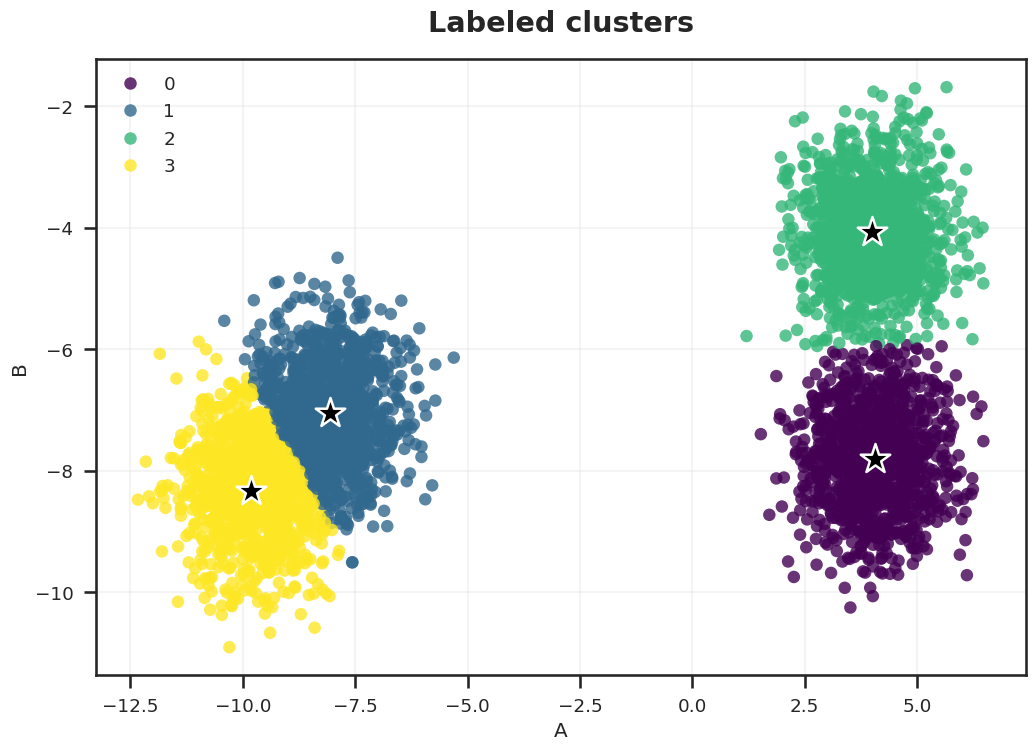

In [ ]:
ax = sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs)
sns.scatterplot(x=centroids[:,0], y=centroids[:,1], marker='*', s=500, color='black', ax=ax)

plt.title('Labeled clusters')
plt.show()

## Model evaluation

Uma boa clusterização vai produzir:
- Alta similaridade intra-cluster
- Pouca similaridade entre clusters

Métricas:
- WCSS
- Silhouette
- Davies Bouldin (`intracluster / intercluster`)
- Calinski Harabasz (`soma_intercluster / soma_intracluster`)

Exemplo de aplicação:

In [ ]:
# sklearn metrics
silhouette_score(X, labels)
davies_bouldin_score(X, labels)
calinski_harabasz_score(X, labels)

62277.935583562205

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

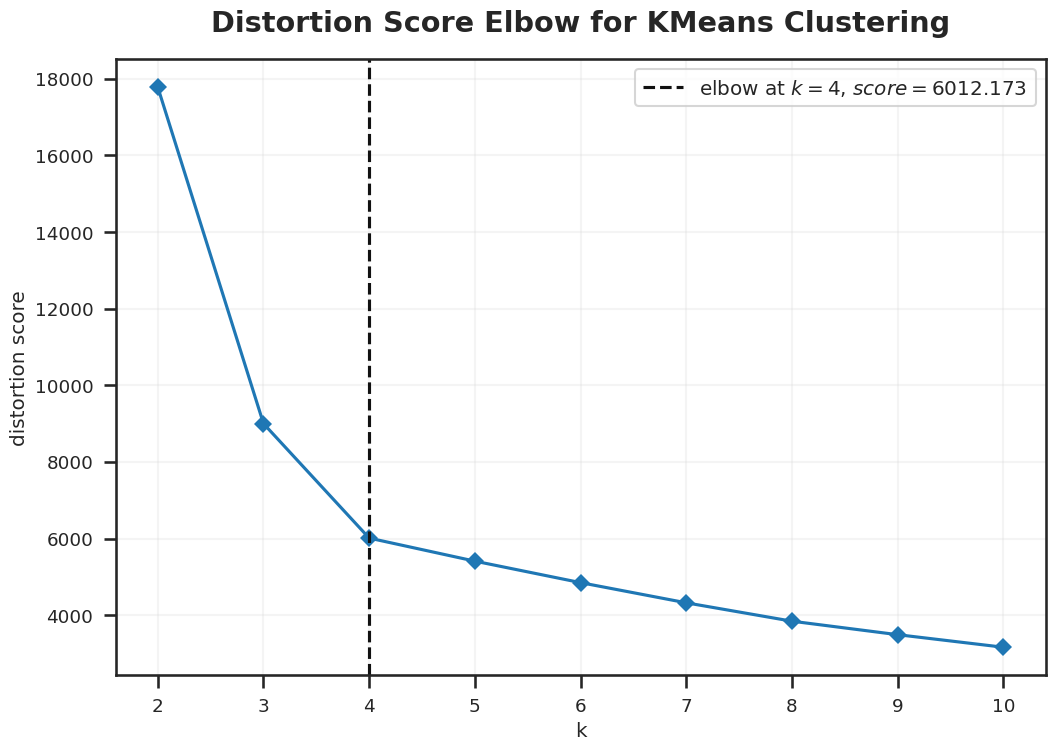

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=10), timings=False)

In [ ]:
# kelbow_visualizer
kelbow_visualizer(KMeans(), X, k=10, timings=False)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


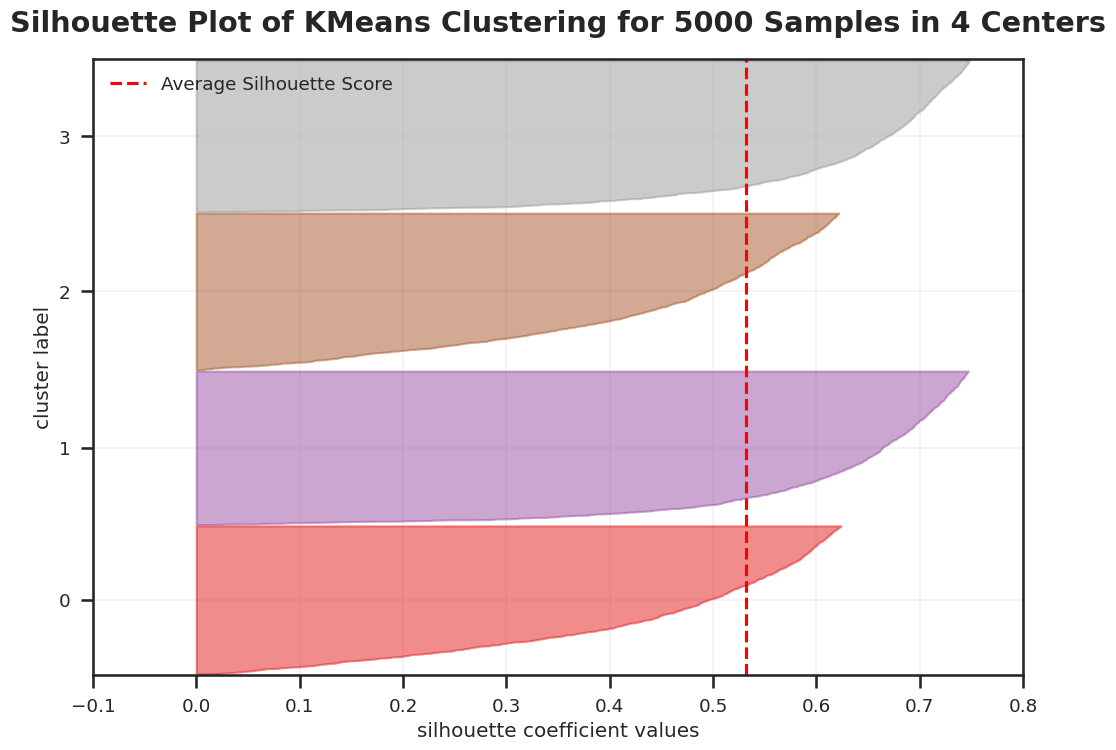

SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 5000 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     estimator=KMeans(n_clusters=4))

In [ ]:
# silhouette_visualizer
silhouette_visualizer(KMeans(n_clusters=4), X)

Testando distintos agrupamentos:

In [ ]:
# Create list of dictionaries

cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []

for k in range(2,11):
  model = KMeans(n_clusters=k, random_state=0)
  labels = model.fit_predict(X)
  cluster_results_dict = {'k': k}
  cluster_results_dict['inertia'] = model.inertia_
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__] = metric(X, labels)
  cluster_metrics_results.append(cluster_results_dict)

cluster_metrics_results

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

[{'k': 2,
  'inertia': 17779.150595346386,
  'silhouette_score': 0.8262277616431835,
  'davies_bouldin_score': 0.262817906318383,
  'calinski_harabasz_score': 59896.743312344566},
 {'k': 3,
  'inertia': 9000.162276781553,
  'silhouette_score': 0.7378972278979631,
  'davies_bouldin_score': 0.4193232619604146,
  'calinski_harabasz_score': 61586.0426837895},
 {'k': 4,
  'inertia': 6012.348728530719,
  'silhouette_score': 0.5318965748797723,
  'davies_bouldin_score': 0.698661254144099,
  'calinski_harabasz_score': 62277.1320104673},
 {'k': 5,
  'inertia': 5449.322015395173,
  'silhouette_score': 0.4530527523098604,
  'davies_bouldin_score': 0.9238217617831903,
  'calinski_harabasz_score': 51654.456370491476},
 {'k': 6,
  'inertia': 4887.757890846713,
  'silhouette_score': 0.3850132261760521,
  'davies_bouldin_score': 1.0417679102675252,
  'calinski_harabasz_score': 46187.1234749108},
 {'k': 7,
  'inertia': 4322.873748669349,
  'silhouette_score': 0.330072451134203,
  'davies_bouldin_score'

In [ ]:
# Create dataframe
pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient()

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,17779.150595,0.826228,0.262818,59896.743312
3,9000.162277,0.737897,0.419323,61586.042684
4,6012.348729,0.531897,0.698661,62277.132010
5,5449.322015,0.453053,0.923822,51654.456370
6,4887.757891,0.385013,1.041768,46187.123475
7,4322.873749,0.330072,1.121149,43613.004800
8,3854.227055,0.327345,1.045160,42014.268331
9,3479.201672,0.332321,0.968800,40776.678272
10,3164.010821,0.325864,0.986773,39908.664572


In [ ]:
# Style dataframe
(
  pd.DataFrame(cluster_metrics_results)
  .set_index('k')
  .style.background_gradient(cmap='Oranges', subset='inertia')
  .highlight_max(subset=['silhouette_score','calinski_harabasz_score'])
  .highlight_min(subset='davies_bouldin_score')
)

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,17779.150595,0.826228,0.262818,59896.743312
3,9000.162277,0.737897,0.419323,61586.042684
4,6012.348729,0.531897,0.698661,62277.132010
5,5449.322015,0.453053,0.923822,51654.456370
6,4887.757891,0.385013,1.041768,46187.123475
7,4322.873749,0.330072,1.121149,43613.004800
8,3854.227055,0.327345,1.045160,42014.268331
9,3479.201672,0.332321,0.968800,40776.678272
10,3164.010821,0.325864,0.986773,39908.664572


Repetindo procedimento acima com dados simulados aleatórios:

In [ ]:
# X_random with numpy
X_random = np.random.rand(*X.shape)
X_random

array([[0.65463113, 0.74871571],
       [0.81315583, 0.579795  ],
       [0.83006757, 0.68239361],
       ...,
       [0.53244486, 0.33365568],
       [0.02891851, 0.36654586],
       [0.89625698, 0.9251088 ]])

In [ ]:
sns.scatterplot(X_random[:,0], X_random[:,1])

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given

In [ ]:
cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []

for k in range(2,11):
  model = KMeans(n_clusters=k, random_state=0)
  labels = model.fit_predict(X_random)
  cluster_results_dict = {'k': k}
  cluster_results_dict['inertia'] = model.inertia_
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__] = metric(X_random, labels)
  cluster_metrics_results.append(cluster_results_dict)

pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient()

In [ ]:
# Style dataframe
(
  pd.DataFrame(cluster_metrics_results)
  .set_index('k')
  .style.background_gradient(cmap='Oranges', subset='inertia')
  .highlight_max(subset=['silhouette_score','calinski_harabasz_score'])
  .highlight_min(subset='davies_bouldin_score')
)

Comparando de forma interativa:

In [ ]:
@interact(k=(2,11), data=['X','X_random'])
def plot_kmeans(k, data):
  data = X if data=='X' else X_random
  model = KMeans(n_clusters=k, random_state=0)
  labels = model.fit_predict(data)
  sns.scatterplot(x=data[:,0], y=data[:,1], hue=labels, **scatter_kwargs)

## High dimensional data

In [ ]:
# Simulate clusters with high dimensional data
X_dim,y_dim = datasets.make_blobs(n_samples=int(1E3), n_features=10, centers=4, cluster_std=.8, random_state=0)
df_dim = pd.DataFrame(X_dim, columns=list(string.ascii_uppercase[:X_dim.shape[1]]))
df_dim.head()

In [ ]:
# Apply PCA
pca = PCA()
pca_components = pca.fit_transform(df_dim)

df_pca = pd.DataFrame(pca_components, columns=[f'PC{i+1}' for i in range(pca_components.shape[1])])
df_pca.head()

In [ ]:
# Verify explained variance
pd.DataFrame(
    {'explained_var': pca.explained_variance_ratio_, 'explained_var_cumsum': pca.explained_variance_ratio_.cumsum()},
    index=df_pca.columns
)

In [ ]:
# Plot PCA with true label
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue=y_dim, **scatter_kwargs);

In [ ]:
# Plot PCA with k-means label
labels = k_means(df_pca.iloc[:,:3], 4)[1]
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue=y_dim, **scatter_kwargs);

In [ ]:
# 3D PCA plot
px.scatter_3d(df_pca, x='PC1', y='PC2', z='PC3', color=labels, template='plotly_dark')

# Hierarchical clustering

**Tipos:**
- Agglomerative (bottom-up)
- Dissimilarity (top-down)

**Vantagens:**
- Fácil interpretação
- Não é necessário estabelecer a quantidade de grupos previamente

**Desvantagens:**
- Não escala bem com muitos dados
- Dendograma fica com visualização inviável para muitas amostras


In [ ]:
# Simulate clusters
X,y = datasets.make_blobs(n_samples=80, n_features=2, centers=4, cluster_std=.6, random_state=0)
df = pd.DataFrame(X, columns=list(string.ascii_uppercase[:X.shape[1]]))
df.head()

In [ ]:
# Hierarchical clustering with sklearn
model = AgglomerativeClustering(n_clusters=4)
labels = model.fit_predict(X)

In [ ]:
sns.scatterplot(data=df, x='A', y='B', hue=y, **scatter_kwargs);

In [ ]:
sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs);

In [ ]:
# Hierarchical clustering with scipy

In [ ]:
Z = linkage(df, method='ward')
dendrogram_dict = dendrogram(Z, color_threshold=10)
plt.show()

In [ ]:
fcluster(Z, 4, criterion='maxclust')

In [ ]:
@interact(method=['single','complete','centroid', 'ward'])
def plot_dendrogram(method):
  Z = linkage(df, method=method)
  dendrogram_dict = dendrogram(Z)
  plt.show()

# DBSCAN

**Vantagens:**
- Não necessita especificar a quantidade de clusters
- Detecta clusters de formatos variados (densos)
- Robusto aos outliers

**Desvantagens:**
- A qualidade do cluster depende muito métrica de distância
- Não funciona bem em clusters com densidades diferentes (OPTICS)

In [ ]:
# Simulate clusters
X,y = datasets.make_blobs(n_samples=int(5E3), n_features=2, centers=4, cluster_std=.8, random_state=0)
df = pd.DataFrame(X, columns=list(string.ascii_uppercase[:X.shape[1]]))
df.head()

In [ ]:
# Train DBSCAN
model = DBSCAN()
labels = model.fit_predict(X)

In [ ]:
# Train DBSCAN (function)
labels = dbscan(X)[1]

In [ ]:
# Visualize output
sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs);

In [ ]:
@interact(eps=(0.01,1, 0.01), min_samples=(1,20))
def custom_dbscan(eps, min_samples):
  _, labels = dbscan(X, eps=eps, min_samples=min_samples)
  sns.scatterplot(data=df, x='A', y='B', hue=labels, palette='tab10')
  plt.show()

In [ ]:
# https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc
from sklearn.neighbors import NearestNeighbors
nn_model = NearestNeighbors(n_neighbors=2).fit(X)
distances, indices = nn_model.kneighbors(X)
distances = np.sort(distances, axis=0)
plt.plot(distances[:,1])
plt.show()

# MeanShift

**Vantagens:**
- Possui apenas um parâmetro principal (bandwidth)
- Não necessita especificar a quantidade de clusters

**Desvantagens:**
- Computacionalmente custoso com grande volume de dados
- Não é possível especificar número de clusters

In [ ]:
# Simulate clusters
# Simulate clusters
X,y = datasets.make_blobs(n_samples=int(1E3), n_features=2, centers=4, cluster_std=.8, random_state=0)
df = pd.DataFrame(X, columns=list(string.ascii_uppercase[:X.shape[1]]))
df.head()

In [ ]:
# Density plot
sns.kdeplot(data=df, x='A', y='B');

In [ ]:
# Model & labels
model = MeanShift()
labels = model.fit_predict(X)

In [ ]:
# Estimating bandwidth
estimate_bandwidth(X)

In [ ]:
# Plot
ax = sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs)
ax.scatter(*model.cluster_centers_.T, marker='*', c='black', s=500)
plt.show()

In [ ]:
@interact(bandwidth=(0.1, 3, 0.01))
def custom_meanshift(bandwidth):
  model = MeanShift(bandwidth=bandwidth, cluster_all=True)
  labels = model.fit_predict(X)
  ax = sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs)
  ax.scatter(*model.cluster_centers_.T, marker='*', c='black', s=500)
  plt.show()

# Gaussian Mixture

In [ ]:
# Simulate clusters
X,y = datasets.make_blobs(n_samples=int(1E3), n_features=2, centers=4, cluster_std=.8, random_state=0)
df = pd.DataFrame(X, columns=list(string.ascii_uppercase[:X.shape[1]]))
df.head()

In [ ]:
# Create model
model = GaussianMixture(n_components=4, covariance_type='spherical')
model.fit(X)

In [ ]:
# Model attributes
model.means_
model.covariances_
model.weights_

In [ ]:
# Model BIC
model.bic(X)

In [ ]:
# Predict labels
model.predict(X)[:5]

In [ ]:
# Predict labels' probability
model.predict_proba(X)[:5]

In [ ]:
model.means_.T

In [ ]:
# Plot
labels = model.predict(X)
ax = sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs)
ax.scatter(*model.means_.T, marker='*', color='black', s=500);

In [ ]:
# Select best model by covariance type and K (Practical Statistics for Data Scientists)
results = []
k_range = range(1,9)
covariance_types = ['full', 'tied', 'diag', 'spherical']

for n_components in k_range:
  for covariance_type in covariance_types:
    mclust = GaussianMixture(n_components=n_components, warm_start=True, covariance_type=covariance_type)
    mclust.fit(X)
    results.append({
      'bic': mclust.bic(X),
      'n_components': n_components,
      'covariance_type': covariance_type,
    })

results = pd.DataFrame(results)
results

In [ ]:
results.sort_values('bic').head()

In [ ]:
# Plot
sns.lineplot(data=results, x='n_components', y='bic', hue='covariance_type');

# Dataset with mix data

**Clustering com dados categóricos:**
- kmodes (apenas dados categóricos)
- kprototypes (dados numéricos e categóricos)
- hierarquical clustering com Glower' distance

**Análises de associação / redução de dimensionalidade:**
- Análise de correspondência simples (CA) - apenas dados categóricos com 2 variáveis
- Análise de correspondência múltipla (MCA) - apenas dados categóricos com 2 ou mais variáveis
- FAMD - dados mistos

## Dados categóricos

In [ ]:
from yellowbrick.datasets import load_mushroom

In [ ]:
# Load data
df_mushroom = load_mushroom()[0]
df_mushroom

In [ ]:
# Clustering with KModes
model = KModes(n_clusters=4)
labels = model.fit_predict(df_mushroom)
print(labels)
print(model.cost_)

In [ ]:
# Avaliando modelo
custos = [KModes(n_clusters=K).fit(df_mushroom).cost_ for K in range(2,11)]
custos

In [ ]:
pd.Series(custos, index=range(2,11)).plot()
plt.xlabel('K')
plt.ylabel('custo')
plt.show()

## Dados mistos

Fonte e dicionário do dataset: [https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)

In [ ]:
df_diabetes = pd.read_csv('https://raw.githubusercontent.com/Ekeany/Clustering-Mixed-Data/main/data/heart.csv')
df_diabetes = df_diabetes.drop(columns='target')
df_diabetes

In [ ]:
# Padroniza dados numéricos
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df_diabetes[numerical_columns] = df_diabetes[numerical_columns].apply(scale)

In [ ]:
# Define posições dos dados categóricos
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
categorical_idx = df_diabetes.columns.isin(categorical_columns).nonzero()[0].tolist()

In [ ]:
# Modelagem com KPrototypes
model = KPrototypes()
model.fit(df_diabetes, categorical=categorical_idx)

In [ ]:
model.predict(df_diabetes, categorical=categorical_idx)

In [ ]:
# Avaliando modelo
model.cost_

In [ ]:
# Avaliando modelo
custos = [
    KPrototypes(K).fit(df_diabetes, categorical=categorical_idx).cost_
    for K in range(2,11)
    ]
custos

In [ ]:
pd.Series(custos, index=range(2,11)).plot()
plt.xlabel('K')
plt.ylabel('custo')
plt.show()

# Wine dataset

## Carregando dados

In [ ]:
df_wines,_ = datasets.load_wine(as_frame=True, return_X_y=True)
df_wines

## Data cleaning

In [ ]:
df_wines.info()

Há dados duplicados?

In [ ]:
df_wines.duplicated().any()

Há dados faltantes?

In [ ]:
df_wines.isna().sum().any()

Há outliers?

In [ ]:
df_wines_scaled = df_wines.apply(scale)

df_wines_scaled.plot.box()
plt.xticks(rotation=60, ha='right');

Identificando e removendo linhas com outliers (|Z-score| > 3):

In [ ]:
outlier_rows = df_wines_scaled.abs().gt(3).any(axis=1)
outlier_rows.sum()

In [ ]:
df_wines_scaled = df_wines_scaled[~outlier_rows]

## Verificando melhor K

In [ ]:
kelbow_visualizer(KMeans(), df_wines_scaled, k=11);

## Clusterizando

Criando e treinando modelo

In [ ]:
model = KMeans(4, random_state=0).fit(df_wines_scaled)

Salvando centroides e labels

In [ ]:
centroids = model.cluster_centers_
labels = model.labels_

## Interpretando clusters

In [ ]:
(
  pd.DataFrame(centroids, columns=df_wines_scaled.columns)
  .T.add_prefix('Grupo_')
  .plot.bar(subplots=True, figsize=(12,12), legend=False)
)

plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
centers = pd.DataFrame(centroids, columns=df_wines.columns)
centers

In [ ]:
# Adaptado do livro "Practical Statistics for Data Scientists"
fig,axes = plt.subplots(nrows=4, figsize=(14,12), sharex=True)

for i,ax in enumerate(axes):
  center = centers.loc[i,:]
  maxPC = 1.01 * center.abs().max()
  colors = ['green' if l > 0 else 'red' for l in center]
  center.plot.bar(ax=ax, color=colors)
  ax.set_ylabel(f'Cluster {i+1}')
  ax.set_ylim(-maxPC, maxPC)
  ax.axhline(color='gray')
  ax.xaxis.set_ticks_position('none')

plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
(
  df_wines[~outlier_rows].assign(cluster=labels)
  .groupby('cluster')
  .agg(['mean','min','median','max'])
)

In [ ]:
(
  df_wines[~outlier_rows].assign(cluster=labels)
  .groupby('cluster')
  .mean()
  .transpose()
  .style.background_gradient(cmap='YlOrRd', axis=1)
)

In [ ]:
silhouette_score(df_wines_scaled[~outlier_rows], labels)